In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import helpers

In [3]:
space = {'type': 'Polygon', 'coordinates': [[[-48.59291698802855, -21.75872227411361], [-48.592911468889156, -21.75875799158797], [-48.59293078003145, -21.758751824936724], [-48.592963922746776, -21.758750446276053], [-48.59301972567977, -21.75875699513915], [-48.59307211568557, -21.75877104794546], [-48.59311691001733, -21.758784972148703], [-48.59316584392849, -21.758802221145572], [-48.59321122641694, -21.758819685979688], [-48.59325703248601, -21.75884065007591], [-48.59330142661952, -21.758864190729753], [-48.59334395915636, -21.75889152382473], [-48.593383721781265, -21.758921320162756], [-48.593422201973, -21.758953068029598], [-48.593459012123674, -21.758986011095487], [-48.59349594907877, -21.759021284304765], [-48.59353042818668, -21.75905680302901], [-48.593565373143406, -21.7590949846458], [-48.593596201003834, -21.759130550134728], [-48.59362688587203, -21.75916606526164], [-48.5936596436776, -21.75920412277202], [-48.593689081186085, -21.75924175490303], [-48.593717964712255, -21.759282428541212], [-48.59374534816925, -21.75932056699054], [-48.593775103138455, -21.759361567981955], [-48.593801779728324, -21.75940065251808], [-48.59382923603039, -21.759441737146403], [-48.59385500790228, -21.759481267746253], [-48.59388104687275, -21.75952106724344], [-48.59390698152191, -21.759560450354456], [-48.59393322373927, -21.759599937786845], [-48.593958676351804, -21.759640374003993], [-48.59398401564977, -21.75968234266594], [-48.59400951412772, -21.759723282503444], [-48.594035544105054, -21.75976570532299], [-48.59406060731112, -21.759806758475065], [-48.594085940313846, -21.75984974786752], [-48.5941094971555, -21.759890701194877], [-48.59413401357381, -21.75993204932456], [-48.59415764056263, -21.75997222923496], [-48.59418170552124, -21.76001237227314], [-48.59420561399787, -21.760052673591986], [-48.59423056388937, -21.760095166558642], [-48.59425419717343, -21.760135384240527], [-48.59427781696763, -21.760175912188572], [-48.59430084950458, -21.760216524672842], [-48.59432542707674, -21.760259517662575], [-48.59434993719981, -21.76030295851467], [-48.59437522973303, -21.760346083704746], [-48.59439929379232, -21.76038648394905], [-48.59442121296854, -21.760421177994942], [-48.59441148410269, -21.760379734537082], [-48.59440154749336, -21.760338688579566], [-48.594392229617654, -21.76029971196209], [-48.594382212968696, -21.76025874424562], [-48.59437182489978, -21.7602196938837], [-48.59436161219861, -21.760181997001496], [-48.59435106225169, -21.760144087879326], [-48.594343614066474, -21.760116173822325], [-48.5943366910854, -21.760074286099382], [-48.594324600599805, -21.76003263849543], [-48.594311385961646, -21.759986876493087], [-48.59429908773268, -21.759941766499253], [-48.594287597994196, -21.759899209680725], [-48.59427561902453, -21.759854700434005], [-48.594262270387446, -21.759810232556163], [-48.594247709464184, -21.759765289836196], [-48.59423405955414, -21.759719834502732], [-48.59422243401809, -21.759675695776707], [-48.59421093978301, -21.75963153816491], [-48.59419946263506, -21.75958754692772], [-48.59418704479623, -21.7595420376349], [-48.5941755550578, -21.759496209082727], [-48.59416421100951, -21.75945416757571], [-48.59415073646727, -21.759407455889345], [-48.59413920805798, -21.759362943045346], [-48.594126103137114, -21.759318026405765], [-48.59411278147962, -21.759271778769516], [-48.59410086726115, -21.759226007773975], [-48.59408856363626, -21.759181337548625], [-48.594075181724236, -21.759135106100246], [-48.594062762086764, -21.75909011391758], [-48.59405066080933, -21.75904544728951], [-48.59403828074204, -21.759001010887914], [-48.5940250220371, -21.758956854175437], [-48.59401152141453, -21.75891172529583], [-48.59399751177568, -21.7588648939996], [-48.59398464427585, -21.758820771461387], [-48.593972678796035, -21.758777282945232], [-48.59395913590538, -21.75873189865814], [-48.593947195606574, -21.758688002749068], [-48.59393557456707, -21.758643825352237], [-48.59392401378216, -21.758599411433636], [-48.59391217330813, -21.758554896790997], [-48.59390111884153, -21.75851044330227], [-48.593889701048795, -21.758465856713883], [-48.593877275116085, -21.75842076560582], [-48.59386505602748, -21.758375955985514], [-48.59385263279273, -21.758330202077104], [-48.593841735707485, -21.75828721358397], [-48.59382918836633, -21.758243591968153], [-48.593816953089856, -21.75819814023197], [-48.593805813187714, -21.758153323417105], [-48.593795014128546, -21.758108154067997], [-48.59378305314533, -21.758061052975165], [-48.593771942021476, -21.758016502359624], [-48.59376103414439, -21.757971219696003], [-48.59375084662423, -21.75792522656792], [-48.59374133719291, -21.757879309882185], [-48.59373204180025, -21.757833356324284], [-48.59372361874995, -21.757787757998585], [-48.59371428288779, -21.757740073245714], [-48.593703621424936, -21.757695490254605], [-48.593691691918025, -21.757650769667237], [-48.59367922731445, -21.757605475312403], [-48.593667025312925, -21.75755952894906], [-48.593656332373826, -21.757513721081295], [-48.59364612686721, -21.757468613785477], [-48.59363639080675, -21.757423775386883], [-48.5936274353578, -21.75737699715063], [-48.593620596912956, -21.757330798977137], [-48.59361477290338, -21.75728636437418], [-48.59360708100195, -21.75724075255863], [-48.59359898800284, -21.75719694028652], [-48.593590359907125, -21.757150896796418], [-48.593582649119924, -21.75710493964118], [-48.59357544015438, -21.757061311730126], [-48.59356910982649, -21.757015425621375], [-48.593561923344055, -21.756969921724476], [-48.59355385822391, -21.756924192997076], [-48.59354526520178, -21.75687944722864], [-48.59353688441962, -21.756834021572786], [-48.59353037782461, -21.756788038337277], [-48.5935243523669, -21.756742538037656], [-48.5935171721797, -21.756697901087193], [-48.59351057924977, -21.75665289721337], [-48.5935048118975, -21.75660804802294], [-48.59349913357812, -21.756563278872193], [-48.59349370706889, -21.756515972733894], [-48.59348886152168, -21.756468993049566], [-48.59348314992741, -21.756424268864862], [-48.59347820905208, -21.756376757681153], [-48.59347524038998, -21.75633144264191], [-48.593471751020445, -21.756285401849766], [-48.59346678226615, -21.75624426775869], [-48.593462754202676, -21.756207588009715], [-48.593459049895216, -21.756182287382615], [-48.59345263233308, -21.75617183456245], [-48.593443247907544, -21.756165058170836], [-48.593431476681246, -21.756162237896945], [-48.59341987542689, -21.756163755952514], [-48.593410327324705, -21.75616915008618], [-48.59340360309375, -21.756178116326964], [-48.59339757763604, -21.756197093820788], [-48.59339069332577, -21.75623815236878], [-48.59338318308738, -21.756283079800255], [-48.59337268350248, -21.7563294353551], [-48.593363334150524, -21.75637213606518], [-48.59335432294358, -21.756416889927493], [-48.5933449475113, -21.75646145313351], [-48.593335485744035, -21.756506088285278], [-48.59332713284084, -21.756552837743243], [-48.593317877018364, -21.756600210431316], [-48.59330885142231, -21.756645104587847], [-48.5932984480649, -21.75669172814071], [-48.59328931185223, -21.756737089045373], [-48.59328150933413, -21.756783106455146], [-48.5932735970988, -21.7568279925178], [-48.593264675824116, -21.75687597044964], [-48.59325594880295, -21.75692161374144], [-48.59324681528824, -21.75696709605461], [-48.59323735172234, -21.757012564877925], [-48.593227317086985, -21.757059803567017], [-48.59321702254749, -21.75710782196836], [-48.593206615592806, -21.757153914021842], [-48.593197259046235, -21.75719820833058], [-48.5931883647512, -21.757242889347822], [-48.593179421892785, -21.75728952818912], [-48.59316895198549, -21.75733640804873], [-48.59315834717995, -21.75738102701274], [-48.593148665078786, -21.757426405004537], [-48.59313923478783, -21.75747102486787], [-48.59312949063343, -21.757515423497978], [-48.5931199964906, -21.757559896771795], [-48.593110759553895, -21.757606033791376], [-48.59310236258392, -21.757651671687256], [-48.593094118498755, -21.757699372627883], [-48.59308454791352, -21.75774695755598], [-48.59307566530964, -21.757794942682438], [-48.5930671820048, -21.757839097596218], [-48.59305749540704, -21.75788590281212], [-48.59304810738422, -21.757930784378175], [-48.59303861683867, -21.75797747178285], [-48.59302870900768, -21.75802389748486], [-48.593019934322456, -21.758068152223416], [-48.59301193035628, -21.758112854824333], [-48.59300401902021, -21.758157790349685], [-48.59299519577161, -21.758205362687306], [-48.592986513716596, -21.758249993342474], [-48.592979120390055, -21.758296810249533], [-48.592973348541136, -21.75834216395964], [-48.592966627907515, -21.758389410742666], [-48.59295878491997, -21.758438614450426], [-48.592951949173084, -21.758484921441948], [-48.592946091888564, -21.758531690684947], [-48.592939636554945, -21.75857987546084], [-48.59293220096026, -21.75862715911603], [-48.592925028866944, -21.758674053364814], [-48.59291698802855, -21.75872227411361]]]}
space = [space,space]
variable = ['ndvi.streambatch','ndvi.sentinel2','ndvi.landsat']
time = {
        'start':'2020-01-01',
        'end':'2023-09-01',
      	'unit':'day'
    }

In [16]:
api_header = {'X-API-Key': open('key.txt').read().strip()}
ndvi_request = {'variable': variable, 'space': space, 'time': time,'aggregation'	: 	'mean' }
response = requests.post('https://api.streambatch.io/async', json=ndvi_request, headers=api_header)
query_id = json.loads(response.content)['id']
access_url = json.loads(response.content)['access_url']
# query_id = '51bcc74d-0c95-4f12-8d14-0a9d61e8522d'
# access_url =  f's3://streambatch-data/{query_id}.parquet'

[query_id, access_url]

['fb87537f-0ed1-4650-aaed-0502de997bae',
 's3://streambatch-data/fb87537f-0ed1-4650-aaed-0502de997bae.parquet']

In [17]:
helpers.wait_for_results(query_id)

Current Status: Running (Tue Aug 22 16:16:31 2023)                       
Final Status: Succeeded


In [19]:
ndvi_data = pd.read_parquet(access_url, storage_options={"anon": True})
ndvi_data

,location,time,polygon,ndvi.landsat,qa.landsat,ndvi.sentinel2,qa.sentinel2,ndvi.streambatch,source.streambatch
0,0,2020-01-01,POLYGON ((-48.59291698802855 -21.7587222741136...,0.513636,1.0,0.340572,1.000000,0.420998,1.0
1,0,2020-01-02,POLYGON ((-48.59291698802855 -21.7587222741136...,0.513636,1.0,0.340572,1.000000,0.423446,0.0
2,0,2020-01-03,POLYGON ((-48.59291698802855 -21.7587222741136...,0.513636,1.0,0.340572,0.000000,0.425124,0.0
3,0,2020-01-04,POLYGON ((-48.59291698802855 -21.7587222741136...,0.513636,1.0,0.340572,0.000000,0.426089,0.0
4,0,2020-01-05,POLYGON ((-48.59291698802855 -21.7587222741136...,0.513636,1.0,0.429932,0.654545,0.437868,1.0
...,...,...,...,...,...,...,...,...,...
2655,1,2023-08-18,POLYGON ((-48.59291698802855 -21.7587222741136...,NaN,NaN,0.105193,1.000000,0.133198,1.0
2656,1,2023-08-19,POLYGON ((-48.59291698802855 -21.7587222741136...,NaN,NaN,0.105193,1.000000,0.124628,0.0
2657,1,2023-08-20,POLYGON ((-48.59291698802855 -21.7587222741136...,NaN,NaN,0.105193,0.000000,0.117628,1.0
2658,1,2023-08-21,POLYGON ((-48.59291698802855 -21.7587222741136...,NaN,NaN,NaN,NaN,0.113182,0.0


In [15]:
# keep only rows in ndvi_data where location==0
ndvi_data = ndvi_data[ndvi_data.location==0]
ndvi_data.head()

# rename column location as 'lat'
ndvi_data = ndvi_data.rename(columns={'location':'lat'})

# save as parquet
ndvi_data.to_parquet('data/cyan_farm1_mean.parquet')


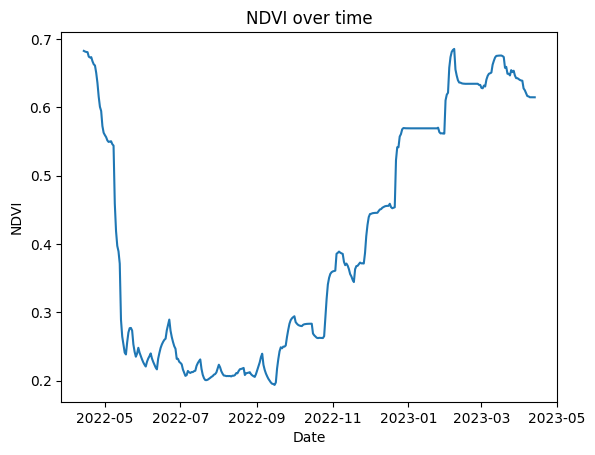

In [22]:
import matplotlib.pyplot as plt
# select rows in ndvi_data where location == 0
ndvi_data = ndvi_data[ndvi_data.location == 0]


start_date = '2022-04-14'
end_date = '2023-04-13'
# select rows in ndvi_data where date is between start_date and end_date
ndvi_data1 = ndvi_data[(ndvi_data.time >= start_date) & (ndvi_data.time <= end_date)]
ndvi_data1
#plot time vs ndvi.sreambatch
plt.plot(ndvi_data1.time, ndvi_data1['ndvi.streambatch'])
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI over time')
plt.show()

